<font color='pink'><b><center>Tercer Proyecto</center></b></font>
<font color='pink'><i><center>Series de tiempo</center></i></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

<font color='pink'><b>Union bases de datos individuales</b></font>

In [2]:
dk17= pd.read_csv(r'C:\Users\Usuario\Downloads\flujo-vehicular-2017.csv')
dk17.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [3]:
dk18= pd.read_csv(r'C:\Users\Usuario\Downloads\flujo-vehicular-2018.csv')
dk18.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [4]:
dk19= pd.read_csv(r'C:\Users\Usuario\Downloads\flujo-vehicular-2019.csv')
dk19.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
df=  pd.concat([dk19, dk18, dk17])

In [6]:
df.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


Para este modelo se filtrará la base de datos y se analizará la estación `Avellaneda` y el método de pago `Telepase`

In [7]:
mask = np.logical_and(df.estacion=='Avellaneda', df.forma_pago == 'TELEPASE')
df = df[mask]

In [8]:
df.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

In [9]:
df.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
7,2019-01-01,1,Martes,Centro,Liviano,159
8,2019-01-01,1,Martes,Centro,Pesado,5
12,2019-01-01,1,Martes,Provincia,Liviano,182
47,2019-01-01,2,Martes,Centro,Liviano,913
51,2019-01-01,2,Martes,Centro,Pesado,6


<font color='pink'><b>Filtro y ajuste a ST</b></font>

In [10]:
df['fecha2'] = pd.to_datetime(df.fecha) + pd.to_timedelta(df.hora_fin, unit = 'h')
df.drop(columns=['fecha','hora_fin'], inplace = True)
df.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
7,Martes,Centro,Liviano,159,2019-01-01 01:00:00
8,Martes,Centro,Pesado,5,2019-01-01 01:00:00
12,Martes,Provincia,Liviano,182,2019-01-01 01:00:00
47,Martes,Centro,Liviano,913,2019-01-01 02:00:00
51,Martes,Centro,Pesado,6,2019-01-01 02:00:00


In [11]:
df.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
7,Martes,Centro,Liviano,159,2019-01-01 01:00:00
8,Martes,Centro,Pesado,5,2019-01-01 01:00:00
12,Martes,Provincia,Liviano,182,2019-01-01 01:00:00
47,Martes,Centro,Liviano,913,2019-01-01 02:00:00
51,Martes,Centro,Pesado,6,2019-01-01 02:00:00


In [12]:
df.sort_values('fecha', inplace = True)
df.reset_index(drop=True, inplace = True)
df

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,17,2017-01-01 00:00:00
1,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
2,Domingo,Centro,Pesado,1,2017-01-01 00:00:00
3,Domingo,Centro,Pesado,10,2017-01-01 00:00:00
4,Domingo,Provincia,Liviano,392,2017-01-01 00:00:00
...,...,...,...,...,...
256527,Martes,Centro,Liviano,1110,2019-12-31 22:00:00
256528,Martes,Provincia,Pesado,8,2019-12-31 23:00:00
256529,Martes,Provincia,Liviano,215,2019-12-31 23:00:00
256530,Martes,Centro,Liviano,204,2019-12-31 23:00:00


<font color='pink'><b>Análisis exploratorio de datos</b></font>

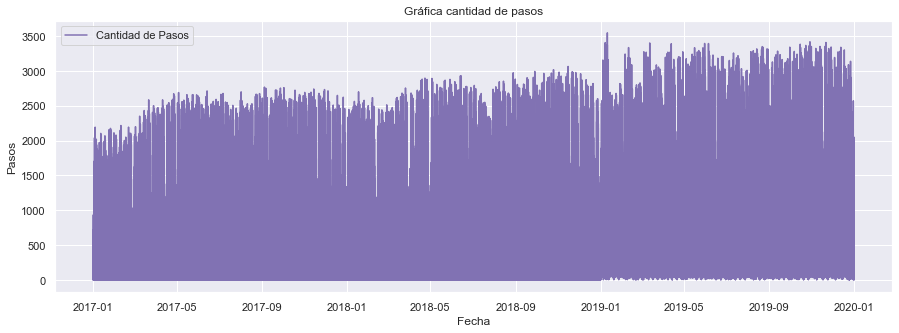

In [13]:
plt.figure(figsize = (15,5))
plt.plot(df.fecha, df.cantidad_pasos, label = 'Cantidad de Pasos', c='m')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.title('Gráfica cantidad de pasos')
# plt.ylim(-10,40)
plt.show()

Text(0.5, 1.0, 'Distribución tipo de vehículo')

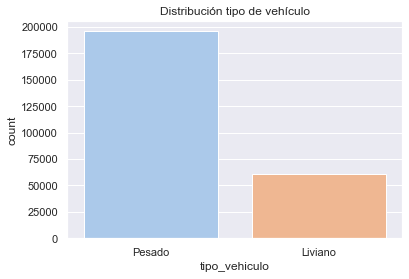

In [14]:
sns.countplot(x='tipo_vehiculo', data=df, palette='pastel')
plt.title('Distribución tipo de vehículo')

Text(0.5, 1.0, 'Distribución peajes por día')

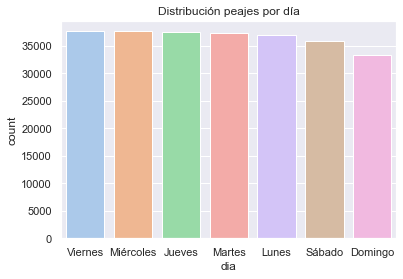

In [15]:
sns.countplot(x='dia', data=df,order= df['dia'].value_counts().index, palette='pastel')
plt.title('Distribución peajes por día')

In [16]:
df.describe()

,cantidad_pasos
count,256532.000000
mean,239.735748
std,494.009575
min,1.000000
25%,10.000000
50%,33.000000
75%,172.000000
max,3545.000000


<font color='pink'><b>Resampleo datos</b></font>

In [17]:
df.sort_values('fecha', inplace = True)
df.reset_index(drop=True, inplace = True)
df

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,17,2017-01-01 00:00:00
1,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
2,Domingo,Centro,Pesado,1,2017-01-01 00:00:00
3,Domingo,Centro,Pesado,10,2017-01-01 00:00:00
4,Domingo,Provincia,Liviano,392,2017-01-01 00:00:00
...,...,...,...,...,...
256527,Martes,Centro,Pesado,8,2019-12-31 22:00:00
256528,Martes,Provincia,Liviano,215,2019-12-31 23:00:00
256529,Martes,Centro,Liviano,204,2019-12-31 23:00:00
256530,Martes,Provincia,Pesado,8,2019-12-31 23:00:00


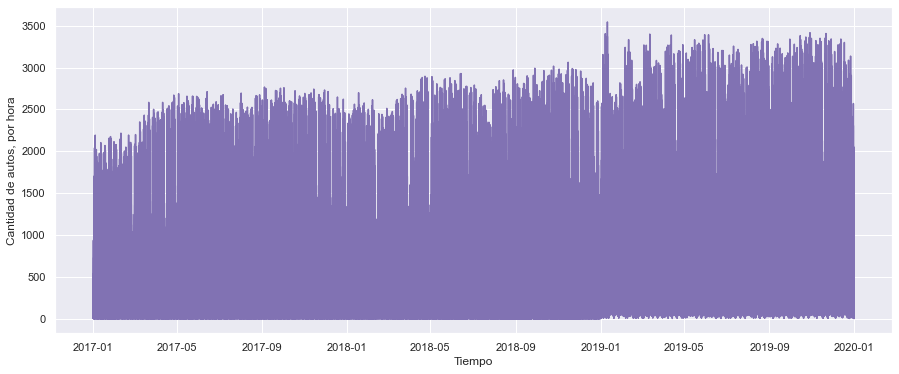

In [18]:
plt.figure(figsize = (15,6))
plt.plot(df.fecha, df.cantidad_pasos, c='m')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [19]:
semanal = df.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,22024
2017-01-08,281097
2017-01-15,285798
2017-01-22,274157
2017-01-29,287236


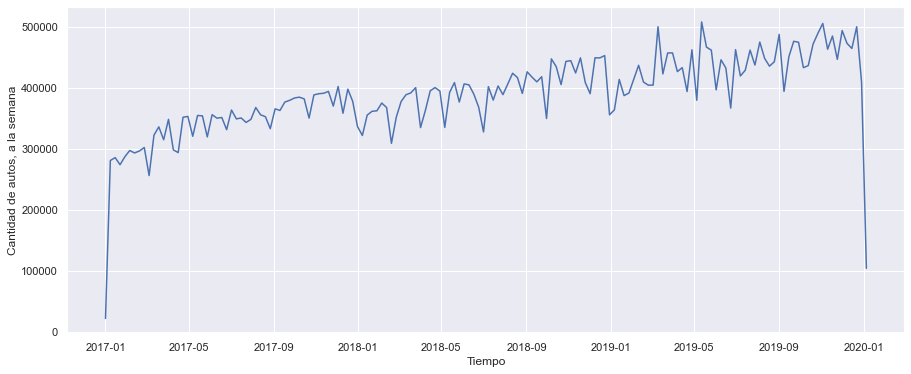

In [20]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, a la semana')
plt.show()

<font color='pink'><b>Modelos</b></font>

Primero se obsevarán los resultados del modelo con ajsute de tiempo

In [21]:
look_back = 16*2

In [22]:
N = semanal.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(125, 32) (125,)


In [23]:
for i in range(X.shape[0]):
    X[i,:] = semanal.iloc[i+look_back]
    y[i] = semanal.iloc[i+look_back]

In [24]:
N_test = 12
N_train = (N - (N_test +1))- look_back
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]

print(X_test.shape, y_test.shape)

(113, 32) (113,)
(12, 32) (12,)


In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=90, random_state=42, n_jobs = 4).fit(X_train,y_train)

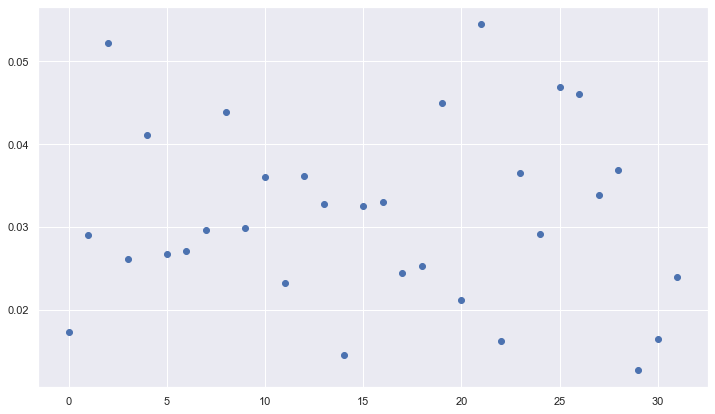

In [26]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.show()

In [27]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

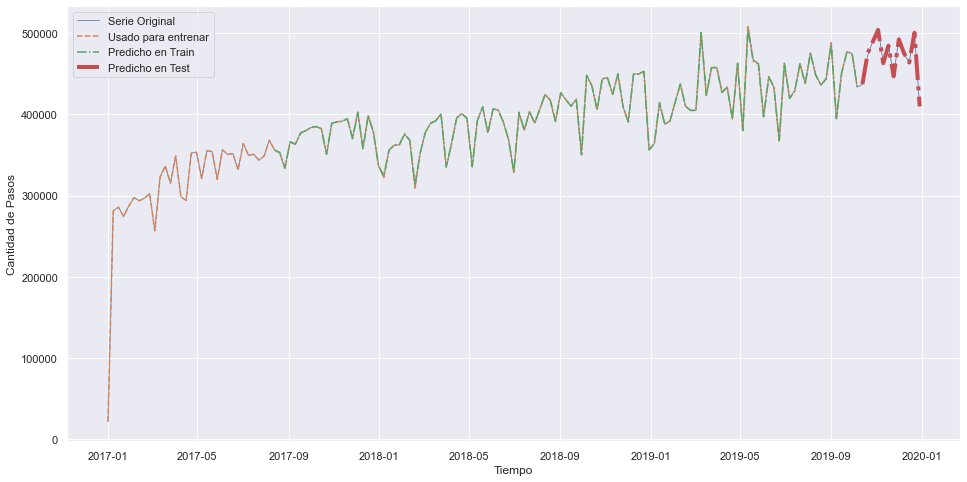

In [28]:
plt.figure(figsize=(16,8))
plt.plot(semanal.index[:length_total], semanal[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.index[:N_train + look_back], semanal[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(semanal.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [29]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 804.9201019120743
Error en Test: 1434.3208102219687


Y también se observarán los resultados sin la modificación

In [30]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [31]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

38526.02859755986


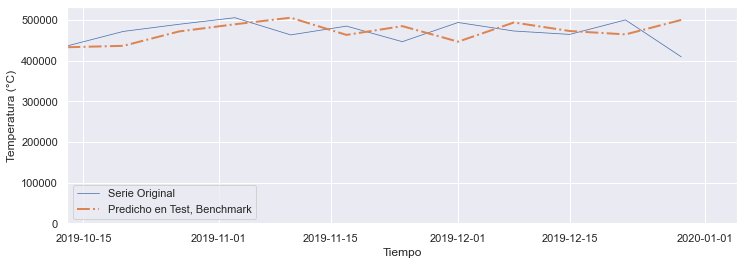

In [32]:
plt.figure(figsize=(12,4))
plt.plot(semanal.index[:length_total], semanal[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(semanal.index[N_train+look_back], semanal.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

<font color='pink'><b>Conclusion</b></font>

Se concluye que el resampleo de datos por hora a semanales ha reducido significativamente los errores en la predicción de los pagos. También se puede observar la tendencia que sigue el uso de Telepagos en esta estación. 

El modelo ajustado presenta sobreajuste debido a un dato atípico del año 2017, entonces para disminuir los errores del set de prueba se debe eliminar este outlier. De esta forma la predicción del uso de Telepagos en la estación Avellaneda será más acertada al no tener en cuenta el dato atípico de enero de 2017, lo que sesga el resultado.